# Análisis y Curación de datos
En el siguiente drive se encontrara en limpio todo el desarrollo de las actividades de este trabajo practico:

https://docs.google.com/document/d/1f-IVwkSUExPVerMejxEmeRx8FIathIcf06KeclyW6Jo/edit?usp=sharing

### Concideraciones
* Dejar bien documentadas las decisiones que se tomaron en los siguientes ejercicios
* Determinar si todas las variables tienen el tipo apropiado.
* Analizar las features con tipo Objeto.
* Cuando sea conveniente llevar todo a minúsculas y quitar signos de puntuación.
* Eliminar palabras muy frecuentes que no nos dicen nada (‘de’, ‘en’, ‘con’, ‘para’, ‘la’, ‘el’, ‘&’, etc.) en la columna title.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
sns.set_context('talk')

from matplotlib import style
style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

#### Realizar el merge entre los 2 datasets que tenemos.

In [ ]:
df_old = pd.read_csv("https://raw.githubusercontent.com/SantiagoMerlo/Mentoria/74fb2dda8eca780036410b344234668004fb925a/diplo.csv")
df_old.describe()

,locationZip,attempts,position,page,stars,reviews,description,snippet
count,73005.000000,73005.0,73005.000000,73005.0,71172.000000,71172.000000,0.0,0.0
mean,14654.390247,1.0,9.449257,1.0,4.175780,372.209099,NaN,NaN
std,9398.702637,0.0,5.950160,0.0,0.483462,1132.339900,NaN,NaN
min,8001.000000,1.0,1.000000,1.0,1.000000,1.000000,NaN,NaN
25%,8014.000000,1.0,4.000000,1.0,3.900000,62.000000,NaN,NaN
50%,8034.000000,1.0,9.000000,1.0,4.200000,170.000000,NaN,NaN
75%,28010.000000,1.0,15.000000,1.0,4.500000,369.000000,NaN,NaN
max,29001.000000,1.0,20.000000,1.0,5.000000,77817.000000,NaN,NaN


In [ ]:
df_old.processDate = pd.to_datetime(df_old.processDate.str.slice(0,10), format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

In [ ]:
df_old.sample(3)

,accountId,accountName,locationId,locationName,uid,directory,keyword,processDate,locationZip,locationCity,locationCountry,locationState,device,language,status,attempts,linkUrl,title,position,page,type,addressPreview,telephonePreview,category,stars,reviews,description,snippet,price
21651,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS,dataDate:2021-02-19T17:35:24.238Z_directory:GO...,GOOGLE_LOCAL_ES,cafeteria,19/02/2021,28040,NaN,ES,NaN,DESKTOP,es-419,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Interjamonal,19,1,LOCAL_LINK,NaN,NaN,Cafetería,3.2,40.0,NaN,NaN,NaN
41753,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS,dataDate:2021-02-19T16:56:56.241Z_directory:GO...,GOOGLE_LOCAL_ES,supermercados abiertos,19/02/2021,28038,NaN,ES,NaN,DESKTOP,es-419,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Condis Supermercados,18,1,LOCAL_LINK,Marca de productos propia en cadena de superme...,913 80 00 12,Supermercado,3.9,62.0,NaN,NaN,NaN
49572,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS,dataDate:2021-02-19T17:11:41.067Z_directory:GO...,GOOGLE_LOCAL_ES,restaurantes abiertos,19/02/2021,8015,NaN,ES,NaN,DESKTOP,es-419,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Restaurante Marcelino 16,2,1,LOCAL_LINK,"Bar restaurante de toda la vida, con jamones c...",NaN,Restaurante,4.3,398.0,NaN,NaN,€


In [ ]:
df_old["locationId"].unique()

array([nan,
       'accounts/111132227739978876098/locations/14042276223470805561',
       'accounts/103758884914323736344/locations/3112367735327447419',
       'accounts/103758884914323736344/locations/12993715915830997105',
       'accounts/103758884914323736344/locations/4893880282558990408',
       'accounts/103758884914323736344/locations/7282040746513467426',
       'accounts/103758884914323736344/locations/6615084914780035798',
       'accounts/103758884914323736344/locations/7082851880764057869',
       'accounts/103758884914323736344/locations/3403247035909076006',
       'accounts/103758884914323736344/locations/1780727533546125054',
       'accounts/103758884914323736344/locations/15286904763581181029',
       'accounts/103758884914323736344/locations/5477763138185043080',
       'accounts/103758884914323736344/locations/14353958980209484192',
       'accounts/103758884914323736344/locations/14840216367191653223',
       'accounts/103758884914323736344/locations/48555591029

In [ ]:
# se importa con formato europeo y se pasa a UTF-8
df_new = pd.read_csv("https://raw.githubusercontent.com/SantiagoMerlo/Mentoria/master/ddatos.csv", sep=";", encoding= 'unicode_escape') 

# renombramos columnas
df_new = df_new.rename(columns={'LANGUAGE': 'language'})
df_new.describe()

,attempts,position,page,reviews,description
count,131138.0,130982.000000,130982.0,69977.000000,0.0
mean,1.0,16.071063,1.0,284.529874,NaN
std,0.0,12.600766,0.0,3547.260918,NaN
min,1.0,1.000000,1.0,0.000000,NaN
25%,1.0,6.000000,1.0,0.000000,NaN
50%,1.0,13.000000,1.0,41.000000,NaN
75%,1.0,20.000000,1.0,235.000000,NaN
max,1.0,51.000000,1.0,441661.000000,NaN


In [ ]:
#El Dato de Price corresponde a caracteres especiales
df_new['price']=df_new['price'].str.encode('latin1')
df_new['price']=df_new['price'].str.decode('utf-8')
df_new['price'].unique()

array([nan, '€', '€€', '€€€', '€€€€', 'lel, T-14, 116'], dtype=object)

In [ ]:
#El Dato de category corresponde a caracteres especiales 
df_new['category']=df_new['category'].str.encode('latin1')
df_new['category']=df_new['category'].str.decode('utf-8')

In [ ]:
## old features vs new features

compare_df = pd.DataFrame({ 
    "old_unique": df_old.nunique(), 
    "new_unique": df_new.nunique(),
    "old_nans_%": df_old.isna().sum()/df_old.shape[0],
    "new_nans_%": df_new.isna().sum()/df_new.shape[0],
    "old_dtypes": df_old.dtypes,
    "new_dtypes": df_new.dtypes,
})
compare_df

,old_unique,new_unique,old_nans_%,new_nans_%,old_dtypes,new_dtypes
accountId,2,4,0.301212,0.998170,object,object
accountName,2,4,0.301212,0.998170,object,object
locationId,20,5,0.301212,0.998170,object,object
locationName,25,3,0.301212,0.998170,object,object
uid,3225,3865,0.000000,0.000000,object,object
directory,2,3,0.000000,0.000000,object,object
keyword,27,53,0.000000,0.000610,object,object
processDate,11,24,0.000000,0.000000,object,object
locationZip,99,465,0.000000,0.000153,int64,object
locationCity,1,2,0.992603,0.998322,object,object


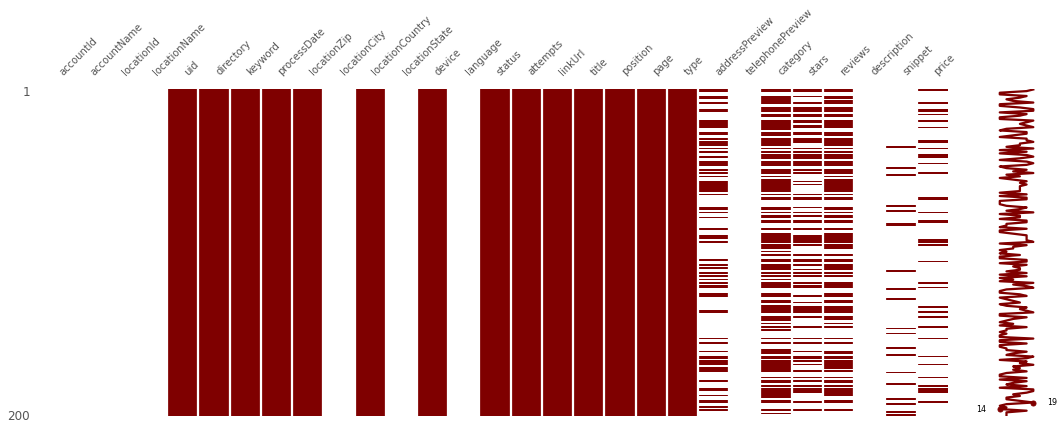

In [ ]:
#Grafico de correlación de datos
import missingno as msno

msno.matrix(df_new.sample(200),figsize=(18, 6), fontsize=10, color=[0.5,0,0]) 

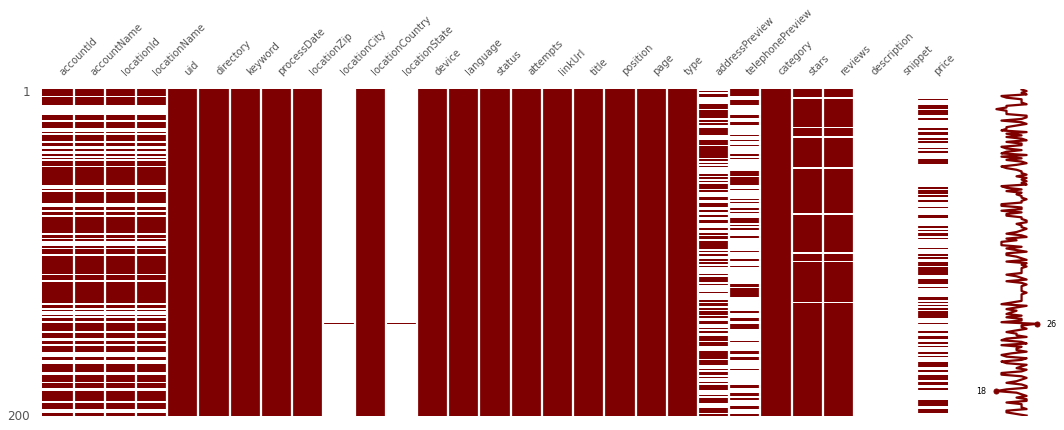

In [ ]:
#Grafico de correlación de datos
import missingno as msno

msno.matrix(df_old.sample(200),figsize=(18, 6), fontsize=10, color=[0.5,0,0]) 

In [ ]:
to_delete = [ "language", "telephonePreview", "accountName", "description", "locationCity", "locationId", "locationName", "locationState", "snippet", "telephonePreview"]

In [ ]:
df = pd.concat([df_new, df_old])
df[:5]

,accountId,accountName,locationId,locationName,uid,directory,keyword,processDate,locationZip,locationCity,locationCountry,locationState,device,language,status,attempts,linkUrl,title,position,page,type,addressPreview,telephonePreview,category,stars,reviews,description,snippet,price
0,NaN,NaN,NaN,NaN,dataDate:2021-06-02T23:37:55.650Z_directory:GO...,GOOGLE_LOCAL_ES,supermercado madrid,2/6/2021,28030,NaN,ES,NaN,DESKTOP,NaN,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Supermercados Suma,9.0,1.0,LOCAL_LINK,"Calle de NÃºÃ±ez de Arce, 7 Â· 915 22 72 59",NaN,€,NaN,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,dataDate:2021-06-02T13:54:55.086Z_directory:GO...,GOOGLE_LOCAL_ES,supermercat online,2/6/2021,8031,NaN,ES,NaN,DESKTOP,NaN,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Supermercats Suma,16.0,1.0,LOCAL_LINK,"C. d'EscÃ²cia, 8 Â· 936 76 39 25",NaN,Supermercado,NaN,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,dataDate:2021-06-02T13:54:55.086Z_directory:GO...,GOOGLE_LOCAL_ES,supermercat online,2/6/2021,8031,NaN,ES,NaN,DESKTOP,NaN,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Supermercados Dia,10.0,1.0,LOCAL_LINK,"Carrer de Cienfuegos, 7-9 Â· 912 17 04 53",NaN,Supermercado,NaN,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,dataDate:2021-06-02T13:54:55.086Z_directory:GO...,GOOGLE_LOCAL_ES,supermercat online,2/6/2021,8031,NaN,ES,NaN,DESKTOP,NaN,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Caprabo supermercado,1.0,1.0,LOCAL_LINK,"Carrer de la Conca de Tremp, 110 Â· 934 18 99 72",NaN,Supermercado,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,dataDate:2021-06-02T13:54:55.086Z_directory:GO...,GOOGLE_LOCAL_ES,supermercat online,2/6/2021,8031,NaN,ES,NaN,DESKTOP,NaN,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Jespac,9.0,1.0,LOCAL_LINK,"Avinguda dels Quinze, 64, 66 Â· 933 52 84 53",NaN,Supermercado,NaN,0.0,NaN,NaN,NaN


In [ ]:
df.shape

(204143, 29)

In [ ]:
# remove all duplicates row
df.drop_duplicates(inplace=True)
df.shape

(163407, 29)

In [ ]:
print("There are {} new rows".format(df.shape[0] - df_old.shape[0]))

There are 90402 new rows


In [ ]:
df.drop(to_delete, axis=1, inplace=True)

## Limpieza de datos
* Procederemos a convertir los datos a un tipo mas correcto
* Procederemos a procesar las diferentes columnas con texto para eliminar caracteres especiales, puntuacion, remplazar cadenas vacías, eliminar números y convertir todo al mismo caso (por ejemplo, minúsculas) para que las palabras idénticas no se vean como palabras distintas

In [ ]:
df = df.astype({
    "accountId": "string",
    "uid": "string", 
    "directory": "string",
    "keyword": "string",
    "processDate": "string",
    "locationZip": "string",
    "locationCountry": "string",
    "device": "string",
    "status": "string",
    "attempts": 'Int64',
    "linkUrl": "string",
    "title": "string",
    "position": "Int64",
    "page": "Int64",
    "type": "string",
    "addressPreview": "string",
    "category": "string",
    "stars": "string",
    "reviews": "Float64",
    "price": "string" 
})

df.processDate = pd.to_datetime(df.processDate, format='%d/%m/%Y')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163407 entries, 0 to 73004
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   accountId        51175 non-null   string        
 1   uid              163407 non-null  string        
 2   directory        163407 non-null  string        
 3   keyword          163387 non-null  string        
 4   processDate      163407 non-null  datetime64[ns]
 5   locationZip      163387 non-null  string        
 6   locationCountry  163407 non-null  string        
 7   device           163407 non-null  string        
 8   status           163407 non-null  string        
 9   attempts         163407 non-null  Int64         
 10  linkUrl          163407 non-null  string        
 11  title            163255 non-null  string        
 12  position         163251 non-null  Int64         
 13  page             163251 non-null  Int64         
 14  type             1632

In [ ]:
spec_chars = ["!", '"', "#", "%", "'", "(", ")", "*", "+", ",", ".", "@", "$", "^", "&", "-", "_","{", "}","[", "]", "<", ">", ":", ";", "?", "/", "=","\\", "`", "~", "¿", "¡",'â','','¬','€']
columns_to_clear = ["keyword", "category"]

In [ ]:
for char in spec_chars:
  for column in columns_to_clear:
    df[column] = df[column].str.replace(char, ' ')

In [ ]:
df.sample(5)

,accountId,uid,directory,keyword,processDate,locationZip,locationCountry,device,status,attempts,linkUrl,title,position,page,type,addressPreview,category,stars,reviews,price
5564,accounts/111132227739978876098,dataDate:2021-01-29T16:21:27.722Z_directory:GO...,GOOGLE_LOCAL_ES,supermercado online,2021-01-29,8016,ES,DESKTOP,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,Keisy,15,1,LOCAL_LINK,<NA>,Supermercado,4.2,267.0,<NA>
126256,<NA>,dataDate:2021-04-27T15:59:39.547Z_directory:GO...,GOOGLE_ES,restaurantes abiertos,2021-04-27,8022,ES,DESKTOP,SUCCEED,1,https://www.bcnrestaurantes.com/restaurantes-b...,Restaurantes de Barcelona abiertos los domingo...,4,1,ORGANIC_LINK,<NA>,<NA>,<NA>,NaN,<NA>
417,accounts/111132227739978876098,dataDate:2020-12-01T04:33:33.570Z_directory:GO...,GOOGLE_LOCAL_ES,supermercat online,2020-12-01,8026,ES,DESKTOP,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,DIA,7,1,LOCAL_LINK,"Alimentación, bebidas, droguería y perfumería ...",Supermercado,3.6,76.0,<NA>
76280,<NA>,dataDate:2021-05-01T23:22:59.765Z_directory:GO...,GOOGLE_ES,365 obrador,2021-05-01,8019,ES,DESKTOP,SUCCEED,1,https://www.infobae.com/america/mexico/2020/12...,Loret revelÃ³ que la prima de AMLO es contrati...,49,1,ORGANIC_LINK,<NA>,<NA>,<NA>,NaN,<NA>
36955,<NA>,dataDate:2021-06-17T23:43:18.067Z_directory:GO...,GOOGLE_PLACES,farmacia,2021-06-17,C1104,AR,DESKTOP,SUCCEED,1,https://www.google.com/maps/place/?q=place_id:...,Farmacia y perfumeria.,14,1,LOCAL_LINK,"JosÃ© AndrÃ©s Pacheco de Melo 2902, C1425AUL C...",pharmacy health point of interest store establ...,2.5,2.0,<NA>


#### Normalizacion del dataset

#### Determinar la cantidad de categorías aparecen en los resultados con menor frecuencia y agruparlas creando una nueva categoría.

In [ ]:
data = df['category'].value_counts()

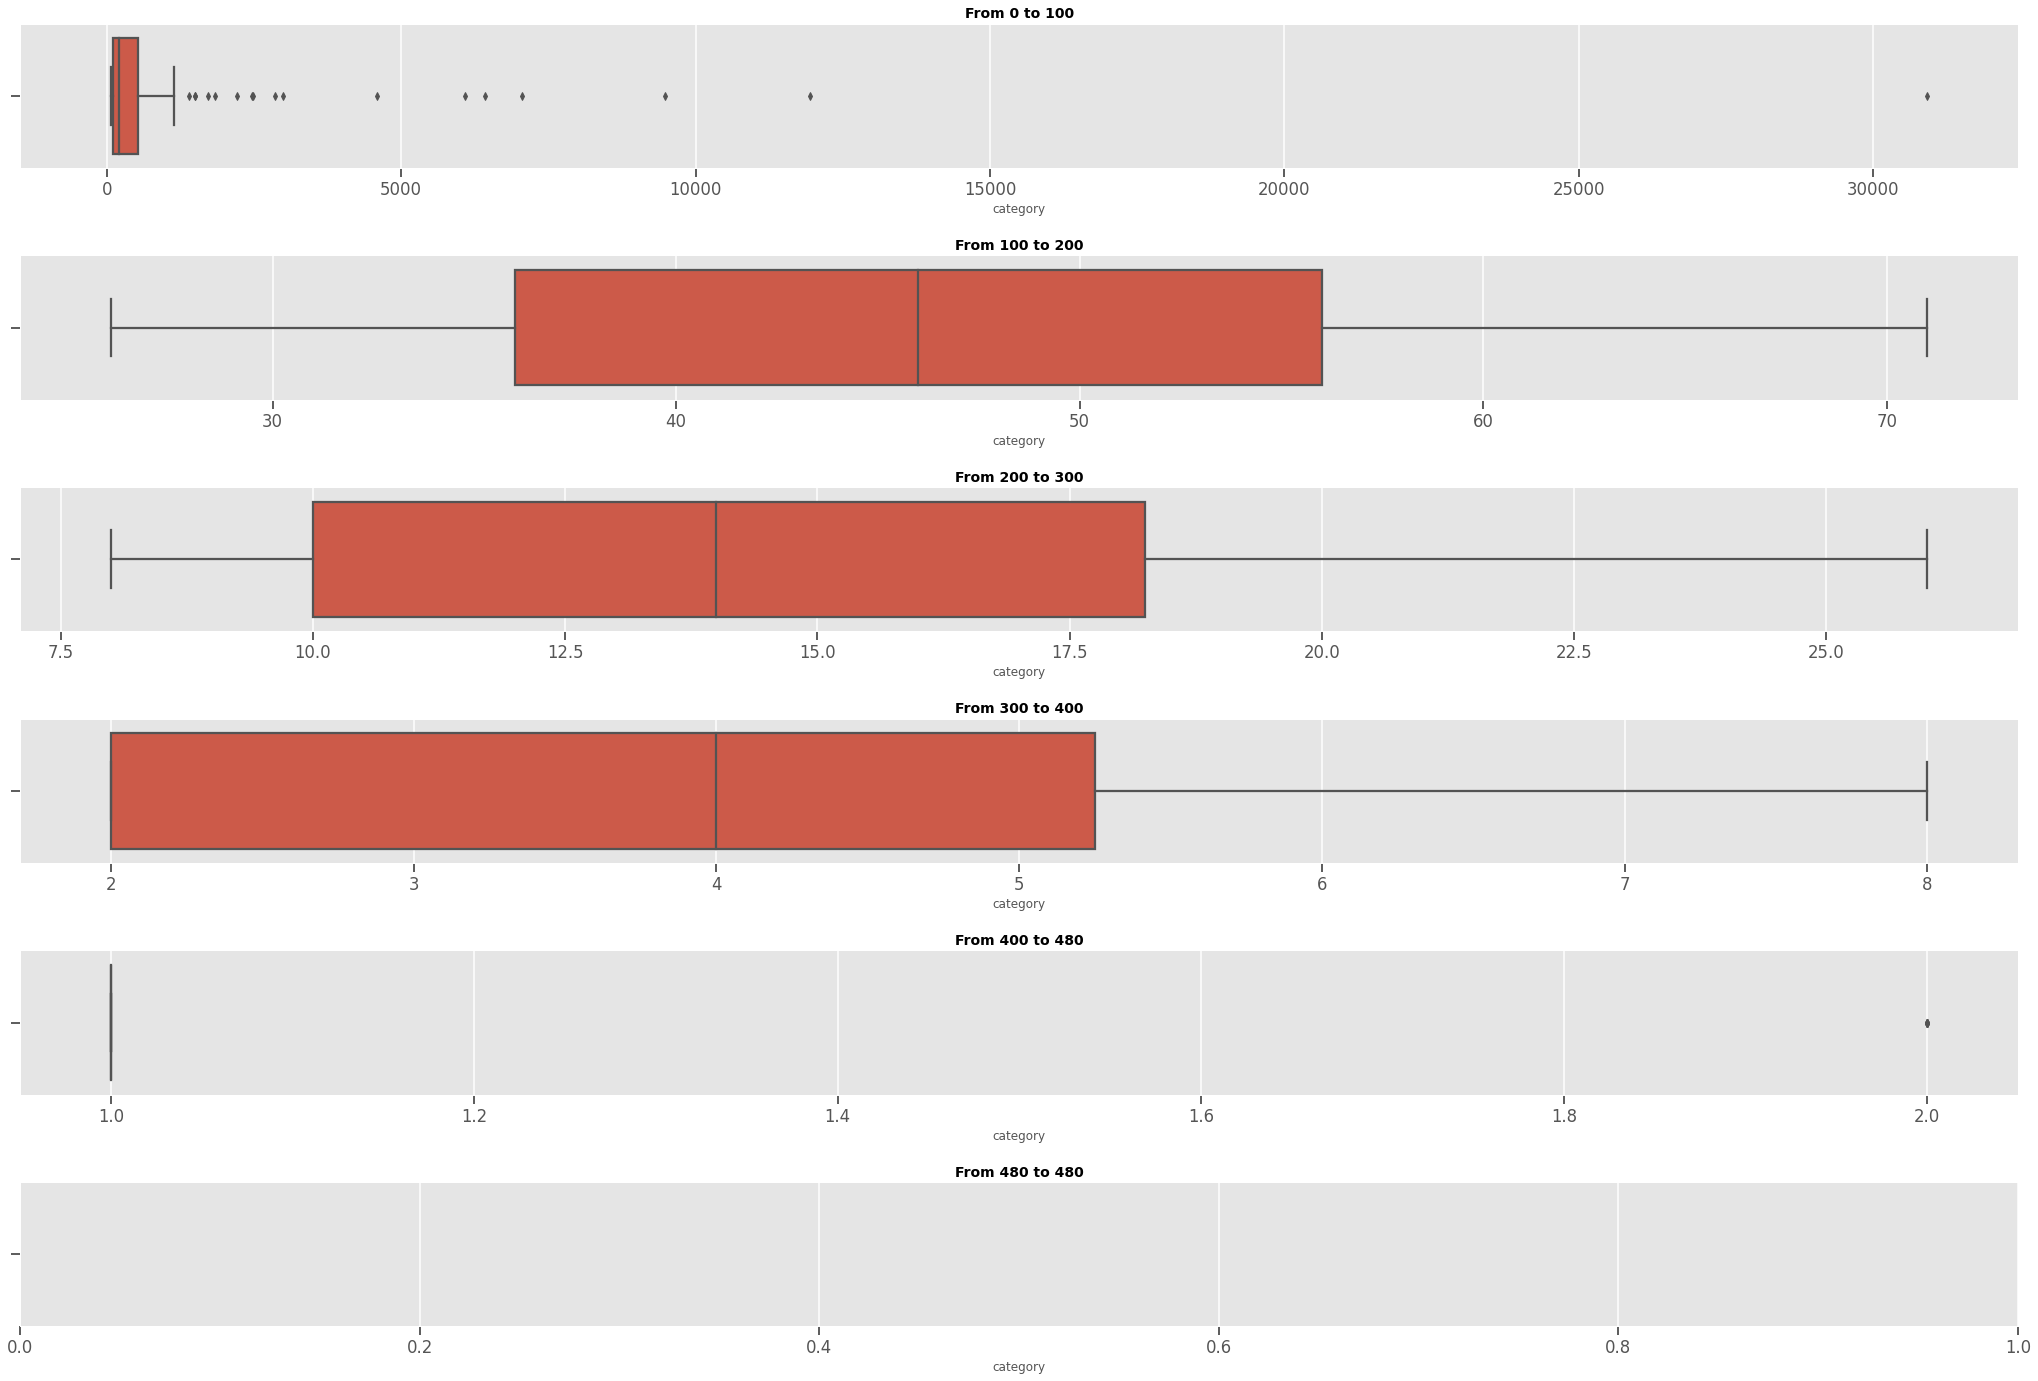

In [ ]:
# "Distribucion de datos por categorias en bloques"
fig, axes = plt.subplots(6, figsize=(30,20))

fig.tight_layout(pad=5.0)

final = len(data)
init = 0
step = 100

for ax in axes.flatten():
  finish = init + step

  if finish > final:
    finish = final

  ax.set_title("From {} to {}".format(init, finish), fontsize = 14,weight = 'bold')

  sns.boxplot(data[init:finish], ax=ax)

  init = finish

In [ ]:
# elegi 50 por respecto del grafico de distribucion anterior. 
others = df.category.value_counts()[(df.category.value_counts() < 50)]

In [ ]:
df.category = df.category.apply(lambda x: "others" if x in others else x).astype("string")

In [ ]:
df.category.value_counts()

Supermercado                                             30920
Restaurante                                              11945
pharmacy health point of interest store establishment     9473
Cafetería                                                 7058
Argentina                                                 6427
                                                         ...  
Pg  de Sant Joan  51                                        50
Comida rápida                                               50
Carrer de Puigcerdà  231                                    50
932 50 30 42                                                50
936 67 09 30                                                50
Name: category, Length: 142, dtype: Int64

#### Imputar valores para las columnas que contengan variables numéricas. Graficar la distribución antes y después de la imputación. Concluir al respecto.

Imputación sobre los datos NaN en **Price**: 

In [ ]:
df['price'].unique()

<StringArray>
[<NA>, '€', '€€', '€€€', '€€€€', 'lel, T-14, 116']
Length: 6, dtype: string

In [ ]:

df['price'].value_counts()

€                 24929
€€                 9221
€€€                1130
€€€€                224
lel, T-14, 116        1
Name: price, dtype: Int64

In [ ]:
from sklearn_pandas import CategoricalImputer

imputer = CategoricalImputer()
df['price']=imputer.fit_transform(df['price'])
df['price'].value_counts()

€                 152831
€€                  9221
€€€                 1130
€€€€                 224
lel, T-14, 116         1
Name: price, dtype: int64

Para el caso de **Price**, se realizó una imputación sobre un valor categorico porque representa la moneda en que se realiza la venta y no el precio de la misma. El dato estaba representado por un caracter especial, el cual se debió dar formato. 


Imputación sobre el dato **STARS**

In [ ]:
df3=df.copy()
df3['stars'].value_counts()

4.5                       8148
4.1                       7410
4.4                       7409
4.2                       6944
4.3                       6724
                          ... 
11.000.000.238.418.500       2
12.999.999.523.162.800       2
1.6                          1
1.3                          1
1.4                          1
Name: stars, Length: 68, dtype: Int64

In [ ]:
df['stars'].isnull().sum()

70434

Para el caso de los registros con datos 12.999.999.523.162.800 y 29.000.000.953.674.300, se trabaja con la corrección de errors de transformarlos en numerico porque claramente corresponden a datos erroneos. Datos que en el paso siguiente serán imputados. Se procede de esta forma, ya que la cantidad de registros para estos casos es minima. 

In [ ]:
df3['stars'] = pd.to_numeric(df3['stars'], errors='coerce')
df3['stars'] = pd.to_numeric(df3['stars'] )
df3['stars'].value_counts()

4.5    8148
4.0    7969
4.1    7410
4.4    7409
4.2    6944
4.3    6724
3.9    5222
4.6    4595
3.8    4242
4.7    3746
3.7    2880
3.5    2610
3.6    2453
5.0    2366
4.8    2194
3.4    1747
4.9    1614
3.0     982
3.3     952
0.0     853
3.2     460
3.1     373
1.0     226
2.9     220
2.8     201
2.5     184
2.7     128
2.0      99
2.6      96
2.3      95
2.4      50
1.8      44
2.2      30
1.5      27
1.7      14
1.9       5
1.4       1
1.3       1
1.6       1
Name: stars, dtype: int64

In [ ]:
df3['stars'].mean()

4.10032167076761

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan,strategy='mean')

df3['stars'] = impute.fit_transform(df3[['stars']])

In [ ]:
df3['stars'].value_counts()

4.100322    80092
4.500000     8148
4.000000     7969
4.100000     7410
4.400000     7409
4.200000     6944
4.300000     6724
3.900000     5222
4.600000     4595
3.800000     4242
4.700000     3746
3.700000     2880
3.500000     2610
3.600000     2453
5.000000     2366
4.800000     2194
3.400000     1747
4.900000     1614
3.000000      982
3.300000      952
0.000000      853
3.200000      460
3.100000      373
1.000000      226
2.900000      220
2.800000      201
2.500000      184
2.700000      128
2.000000       99
2.600000       96
2.300000       95
2.400000       50
1.800000       44
2.200000       30
1.500000       27
1.700000       14
1.900000        5
1.400000        1
1.300000        1
1.600000        1
Name: stars, dtype: int64

In [ ]:
df['stars']=df3['stars']

La imputación se realizó sobre los datos faltas con el valor de la media. Se tomó como dato faltante el calor NaN, la imputación se realizó a traves de **sklearn** . Podemos corroborar la misma, ya que el valor medio de éstos datos es 4.10032167076761 y lo vemos reflejado en los 80945 registros que estaban representado con 0 en la agrupación anterior. No fue factible Eliminarlos, ya que estariamos reduciendo considerablemente nuestro dataframe.  Se toma el dato de Stars en 0, como dato sin calificación, por tal motivo la decisión hasta ahora es dejarlos como válidos. 

Imputación sobre la variable **Reviews**:

In [ ]:
df['reviews'].value_counts()

0.0       23802
1.0        1484
2.0        1194
4.0        1015
12.0        863
          ...  
2250.0        1
3347.0        1
3312.0        1
1307.0        1
2104.0        1
Name: reviews, Length: 2469, dtype: int64

In [ ]:
df['reviews'].isnull().sum()

47438

Se encontraron 47438 valores NaN para esta columna

In [ ]:
df['reviews'].median()

87.0

In [ ]:
df4=df.copy()

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan,strategy='median')

df4['reviews'] = impute.fit_transform(df4[['reviews']])

In [ ]:
df4['reviews'].value_counts()

87.0      47600
0.0       23802
1.0        1484
2.0        1194
4.0        1015
          ...  
1162.0        1
2250.0        1
3347.0        1
3312.0        1
2104.0        1
Name: reviews, Length: 2469, dtype: int64

In [ ]:
df['reviews']=df4['reviews'] 


Para este caso, se imputo sobre los valores NaN y no sobre los valores 0 ya que este dato representa la no existencia de Reviews. En cambio NaN lo tomamos como dato faltante. 

#### Realizar los encodings necesarios sobre las variables categóricas: directory, device, category, type y title. Podrían utilizar One Hot Encoder de sklearn.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["directory", "device", "category", "type", "title"]

encode_df = df[categorical_cols]

encode_df = encode_df.add_prefix("cat_")

encode_df.fillna("", inplace=True)

le = LabelEncoder()
encode_df = encode_df.apply(lambda col: le.fit_transform(col))
encode_df = encode_df.join(df[categorical_cols])

encode_df.fillna("", inplace=True)

In [ ]:
encode_df.sample(5)

,cat_directory,cat_device,cat_category,cat_type,cat_title,directory,device,category,type,title
43417,1,0,100,1,13035,GOOGLE_LOCAL_ES,DESKTOP,Restaurante,LOCAL_LINK,Restaurante Piripipao
66313,0,0,0,2,9646,GOOGLE_ES,DESKTOP,,ORGANIC_LINK,Los restaurantes abiertos el Domingo - Oficio ...
464,1,0,91,1,11231,GOOGLE_LOCAL_ES,DESKTOP,Pizza,LOCAL_LINK,Pizza Circus
63990,0,0,0,2,171,GOOGLE_ES,DESKTOP,,ORGANIC_LINK,"365 PANADERIA CAFETERIA, Sabadell - Fotos y Re..."
4247,1,0,107,1,5604,GOOGLE_LOCAL_ES,DESKTOP,Supermercado,LOCAL_LINK,DIA


In [ ]:
 #se tienen que limpiar todos los datos o inputarlos para que funciones esta funcion
 #es mucho datos en memoria, por lo que no se puede realizar onHotEncoder de todos. Por lo que vamos a hacerlo uno por uno
 #one_hot = []
 #for col in categorical_cols:
   #cat_col = "cat_" + col
   #cols = [cat_col, col]
   #temp = encode_df[cols].join(pd.DataFrame(OneHotEncoder().fit_transform(encode_df[cols]).toarray().reshape(-1,1)))
   #one_hot.append(temp)

In [ ]:
cols = ["category","cat_category"] 
matrix_one_hot = pd.DataFrame(OneHotEncoder().fit_transform(encode_df[cols]).toarray())
one_hot = encode_df[cols].join(matrix_one_hot)
one_hot

,category,cat_category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285
0,,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Restaurante de comida para llevar,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,,102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Restaurante de comida para llevar,102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Supermercado,107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131123,Pizza,91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131126,others,138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131129,others,138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131132,Restaurante,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
matrix_one_hot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
281694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
281695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Se podría determinar la distancia entre el código postal donde se realiza la búsqueda y el código postal de los primeros 3 resultados (position 1, 2 y 3)? Se podría determinar la distancia entre el código postal donde se realiza la búsqueda y el código postal de los últimos 3 resultados (position 18, 19 y 20)? De ser posible determinarla: crear dos nuevas columnas que tengan la distancia promedio para los 3 primeros resultados y otra columna que tenga la distancia promedio para los últimos 3 resultados .

In [ ]:
# lo que hice a continuacion es analizar la distribucion de las position con respecto del locationZip
df.sample(1)

,accountId,uid,directory,keyword,processDate,locationZip,locationCountry,device,status,attempts,linkUrl,title,position,page,type,addressPreview,category,stars,reviews,price
3245,accounts/111132227739978876098,dataDate:2021-02-19T16:45:39.718Z_directory:GO...,GOOGLE_LOCAL_ES,supermercados,2021-02-19,28012,ES,DESKTOP,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,DIA,9,1,LOCAL_LINK,"Alimentación, bebidas, droguería y perfumería ...",Supermercado,3.8,401.0,€


In [ ]:
df.locationZip.nunique()

370

In [ ]:
df_temp = df.groupby(["position"]).agg({"locationZip": ["nunique", "count"]}) 

In [ ]:
df_temp

locationZip      
             nunique count
position                  
1                366  9721
2                366  8833
3                366  8423
4                366  7005
5                366  6978
6                366  6954
7                366  6925
8                366  6892
9                366  6859
10               366  6834
11               366  6525
12               366  6491
13               366  6468
14               366  6455
15               366  6438
16               366  6426
17               366  6418
18               366  6405
19               366  6397
20               366  6388
21                48   808
22                48   808
23                48   808
24                48   808
25                48   808
26                48   808
27                48   808
28                48   808
29                48   808
30                48   808
31                48   808
32                48   808
33                48   808
34                48   808
35                48   808
36                48   808
37                48   808
38                48   808
39                48   808
40                48   808
41                48   808
42                48   808
43                48   808
44                48   808
45                48   808
46                48   808
47                48   808
48                48   806
49                48   604
50                48   163
51                 7     7

Analisis de santi: Teniendo **370** locationZip podemos ver que la mayoria de los valores pertenecen a todas las posiciones. Los que tienen menos LocationZip son los que cuentan con muy poca cantidad de datos. En base de esto, planteo las siguientes hipotesis:
* Todas los locationZip tiene posiciones por lo que no se puede plantear correlacion. En otras palabras: en cierto modo en cada locationZip se tiene sus busquedas que estan dentro del top.

#### Determinar cuáles columnas son candidatas a ser desechadas por no aportar valor.

In [ ]:
# Aquí tenemos que preprocesar la matriz antes de aplicar PCA
scaled_dense_feature_matrix = matrix_one_hot

In [ ]:
scaled_dense_feature_matrix.shape

(281697, 286)

In [ ]:
scaled_dense_feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281697 entries, 0 to 281696
Columns: 286 entries, 0 to 285
dtypes: float64(286)
memory usage: 614.7 MB


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) #seleccionamos 10 por el costo computacional
pca.fit(scaled_dense_feature_matrix) #aca entrenamos
proyected_features = pca.transform(scaled_dense_feature_matrix) #aca transformamos
proyected_features.shape

(281697, 10)

In [ ]:
#veo que componentes explican mayor vaianza
pca.explained_variance_ratio_ 

array([0.18142954, 0.11598826, 0.06167496, 0.05201706, 0.04763507,
       0.03854245, 0.03492449, 0.03047145, 0.02892717, 0.02424244])

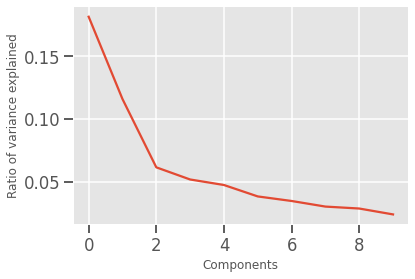

In [ ]:
#ploteo para ver que cuantos componentes me quedo
import matplotlib.pyplot as plt
import seaborn 
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
seaborn.despine()

#### Realizar una reducción de dimensiones utilizando PCA. Concluir al respecto.

In [ ]:
#aca poner el numero de columnas con que me quedo
scaled_dense_feature_matrix[['pca1_scaled','pca2_scaled']] = proyected_features[:,:2] 
scaled_dense_feature_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,pca1_scaled,pca2_scaled
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001066,0.347741
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005024,0.340586
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005024,0.340586
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011115,0.333431
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.951114,-0.657137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003056,0.329010
281693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.003282,0.365618
281694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.003282,0.365618
281695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034458,0.694773


In [ ]:
# Grabamos dataframe resultante
scaled_dense_feature_matrix.to_csv('dataset_procesado.csv', index=False)